In [1]:
# !unzip "./TodosComics2.zip" -d "./"

# IMPORTS

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import ast

In [3]:
comics = pd.read_csv("TodosComics.csv", index_col=0)
characters = pd.read_csv("TodosPersonagens.csv", index_col=0)
creators = pd.read_csv("TodosCreators.csv", index_col=0)
events = pd.read_csv("TodosEvents.csv", index_col=0)
series = pd.read_csv("TodosSeries.csv", index_col=0)
creators_rel_events = pd.read_csv("creators_ids_events.csv")
events_rel_comics = pd.read_csv("events_ids_comics.csv")
creators_rel_series = pd.read_csv("creators_ids_series.csv")


# FUNCTIONS

In [4]:
def categorize_duration(years):
    if years > 25:
        return "Durou mais que 25 anos"
    elif years >= 15 and years <= 25:
        return "Durou entre 25 e 15 anos"
    elif years < 15 and years >= 5:
        return "Durou entre 14 e 5 anos"
    else:
        return "Durou menos que 5 anos"

In [5]:
def get_onsale_year(date_str):
    try:
        date_list = ast.literal_eval(date_str)
        for d in date_list:
            if d['type'] == 'onsaleDate':
                return d['date'][:4]  # Return only the year part
    except (ValueError, SyntaxError, TypeError):
        return None  # If it fails, return None

In [6]:
events = events[~events["start"].isna()]

events.loc[:, "Ano_Inicio"] = events["start"].str.split('-').str[0].astype(int)
events.loc[:, "Ano_Final"] = events["end"].str.split('-').str[0].astype(int)
events = events[events["Ano_Final"] <= 2025]

events.loc[:, "duracao"] = events["end"].str.split('-').str[0].astype(int) - events["start"].str.split('-').str[0].astype(int)

events.loc[:, "categoria_duracao"] = events["duracao"].apply(categorize_duration)

<ipython-input-6-b5e02d9d1a8f>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  events.loc[:, "Ano_Inicio"] = events["start"].str.split('-').str[0].astype(int)
<ipython-input-6-b5e02d9d1a8f>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  events.loc[:, "Ano_Final"] = events["end"].str.split('-').str[0].astype(int)


# INSIGHTS

## Verificando Integridade da base de dados

In [7]:
Nan_relation = {}
for col in comics.columns:
  Nan_relation[col] = comics[col].isna().sum()

df = pd.DataFrame(list(Nan_relation.items()), columns=['Colunas', 'Quantidade'])
df = df[df["Quantidade"] > 0]

fig = px.bar(df, x='Colunas', y='Quantidade',
             color="Colunas",
             template="presentation",
             labels={'Colunas': 'Colunas', 'Quantidade': 'Frequência de Nulos'},
             title="Quantidade de valores nulos por coluna em Comics")

fig.update_layout(xaxis_tickangle=-15)
fig.show()

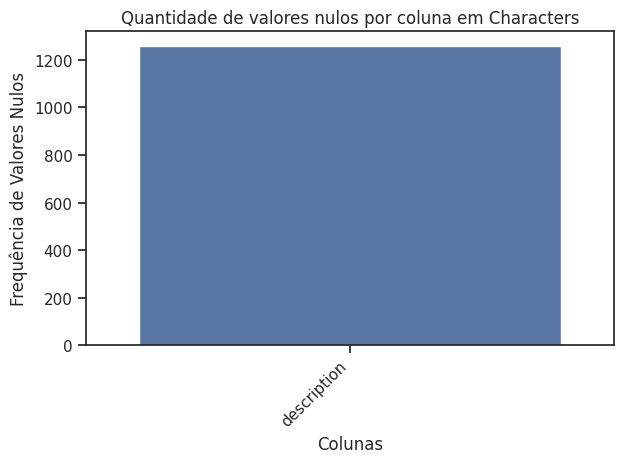

In [8]:
Nan_relation = {}
for col in characters.columns:
  Nan_relation[col] = characters[col].isna().sum()

df = pd.DataFrame(list(Nan_relation.items()), columns=['Colunas', 'Quantidade'])
df = df[df["Quantidade"] > 0]

sns.set_theme(style='ticks')
sns.barplot(data=df, x="Colunas", y="Quantidade")
plt.xlabel("Colunas")
plt.ylabel("Frequência de Valores Nulos")
plt.title("Quantidade de valores nulos por coluna em Characters")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


In [9]:
Nan_relation = {}
for col in comics.columns:
  Nan_relation[col] = comics[col].isna().sum()

df = pd.DataFrame(list(Nan_relation.items()), columns=['Colunas', 'Quantidade'])
df = df[df["Quantidade"] > 0]

fig = px.bar(df, x='Colunas', y='Quantidade',
             color="Colunas",
             template="presentation",
             labels={'Colunas': 'Colunas', 'Quantidade': 'Frequência de Nulos'},
             title="Quantidade de valores nulos por coluna em Comics")

fig.update_layout(xaxis_tickangle=-15)
fig.show()

In [10]:
characters["last_modified"] = characters["modified"].str.split('-').str[0]
personagens_modificados = characters["last_modified"].value_counts().reset_index()
personagens_modificados.columns = ["Ano", "Quantidade"]

media = personagens_modificados["Quantidade"].mean()

personagens_modificados[personagens_modificados["Quantidade"] > media]


fig = px.bar(personagens_modificados, x='Ano', y='Quantidade',
             color="Ano",
             template="presentation",
             labels={'Colunas': 'Ano de Modificação', 'Quantidade': 'Quantidade de Modificações'},
             title="Quantidade de modificações por ano em Characters")

fig.update_layout(xaxis_tickangle=-45)
fig.show()

In [11]:
comics["last_modified"] = comics["modified"].str.split('-').str[0]
comics_modificados = comics["last_modified"].value_counts().reset_index()
comics_modificados.columns = ["Ano", "Quantidade"]

media = abs(comics_modificados["Quantidade"].mean())

comics_modificados[comics_modificados["Quantidade"] > media]

fig = px.bar(comics_modificados, x='Ano', y='Quantidade',
             color="Ano",
             template="presentation",
             labels={'Colunas': 'Ano de Modificação', 'Quantidade': 'Quantidade de Modificações'},
             title="Quantidade de modificações por ano em Comics")

fig.update_layout(xaxis_tickangle=-45)
fig.show()

## PERSONAGENS COM APARIÇÃO ACIMA DA MÉDIA

In [12]:
most_comics_characters = characters[characters["comics.available"] > characters["comics.available"].mean()]

media_de_aparicao = characters["comics.available"].mean()

print(f"Existem {len(most_comics_characters)} personagens, com aparições acima da média (acima de {int(media_de_aparicao)} aparições)")

print("Personagens que mais aparecem")
most_comics_characters[["id", "name", "description", "comics.available", "stories.available",  "events.available"]].sort_values("comics.available", ascending=False).head(10).reset_index(drop=True)

Existem 280 personagens, com aparições acima da média (acima de 65 aparições)
Personagens que mais aparecem


,id,name,description,comics.available,stories.available,events.available
0,1009610,Spider-Man (Peter Parker),"Bitten by a radioactive spider, high school st...",4533,6588,37
1,1009726,X-Men,Feared and hated by humans because they're dif...,4113,5820,43
2,1009718,Wolverine,Born with super-human senses and the power to ...,2761,3811,44
3,1009368,Iron Man,"Wounded, captured and forced to build a weapon...",2745,4098,31
4,1009220,Captain America,"Vowing to serve his country any way he could, ...",2545,3723,30
5,1009165,Avengers,Earth's Mightiest Heroes joined forces to take...,2298,3129,32
6,1009664,Thor,"As the Norse God of thunder and lightning, Tho...",1903,2827,27
7,1009351,Hulk,Caught in a gamma bomb explosion while trying ...,1777,2710,26
8,1009299,Fantastic Four,"After being exposed to cosmic rays, Reed Richa...",1564,2437,24
9,1009262,Daredevil,"Abandoned by his mother, Matt Murdock was rais...",1286,1994,17


In [13]:
print("Personagens que menos aparecem")
most_comics_characters[["name", "description", "comics.available", "stories.available",  "events.available"]].sort_values("comics.available", ascending=True).head(10).reset_index(drop=True)

Personagens que menos aparecem


,name,description,comics.available,stories.available,events.available
0,Spider-Man (Ben Reilly),NaN,66,68,1
1,Penance (Robert Baldwin),NaN,66,84,6
2,Omega Red,NaN,66,76,1
3,Spider-Ham (Larval Earth),As Spider-Ham Peter faced such nefarious foes ...,67,68,0
4,Fantomex,NaN,67,74,4
5,Dum Dum Dugan,NaN,67,84,3
6,Storm (Ultimate),"Ororo Munroe was raised in Morocco, learning E...",67,122,0
7,Cyclops (Ultimate),NaN,67,121,0
8,Iceman (Ultimate),NaN,67,118,0
9,Annihilus,NaN,67,85,1


In [14]:
nao_possuem_desc = len(most_comics_characters[most_comics_characters["description"].isna()])
possuem_desc = len(most_comics_characters[~most_comics_characters["description"].isna()])

print(f"A quantidade de personagens que têm a descrição nula é: {nao_possuem_desc}")
print(f"A quantidade de personagens que não têm a descrição nula é: {possuem_desc}")

A quantidade de personagens que têm a descrição nula é: 205
A quantidade de personagens que não têm a descrição nula é: 75


<ipython-input-15-0d22c6bda754>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



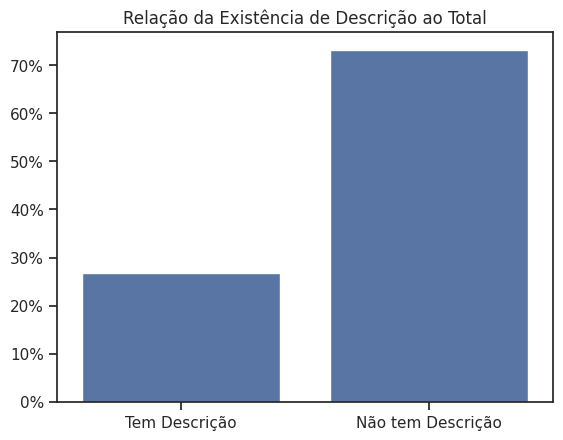

In [15]:
most_comics_characters["Has_Desc"] = most_comics_characters["description"].apply(lambda x: 0 if pd.isna(x) else 1)

sns.barplot(x=["Tem Descrição", "Não tem Descrição"], y=[(possuem_desc/len(most_comics_characters))*100, (nao_possuem_desc/len(most_comics_characters))*100])
plt.gca().yaxis.set_major_formatter(FuncFormatter(lambda y, _: f'{y:.0f}%'))
plt.title("Relação da Existência de Descrição ao Total")
plt.show()

In [16]:
corr_cols = round(float(most_comics_characters["Has_Desc"].corr(most_comics_characters["comics.available"])),2)
print(f"A correlação entre ter descrição e a quantidade de quadrinhos disponíveis dos personagem é de {corr_cols}")

A correlação entre ter descrição e a quantidade de quadrinhos disponíveis dos personagem é de 0.27


## Quantidade de Histórias

In [17]:
comics['onsale_year'] = comics['dates'].apply(get_onsale_year)
comics['onsale_year'] = comics['onsale_year'].astype(int)
comics = comics[(comics['onsale_year'] >= 1940) & (comics['onsale_year'] <= 2025)]

comics['Preco'] = comics['prices'].apply(lambda x: ast.literal_eval(x)[0]['price'])

price_year = comics[["Preco", "onsale_year"]].rename(columns={"onsale_year": "Ano"})

comics = comics[~comics["id"].isna()]
comics["id"] = comics["id"].astype(int)

In [18]:
preco_maior_zero = len(price_year[price_year["Preco"]>0])
media_historias = comics["stories.available"].mean()


print(f"Quantidade de linhas geral: {len(price_year)}")
print(f"Quantidade de linhas com preço acima de zero: {preco_maior_zero}")


comics = pd.concat([comics, price_year["Preco"]], axis=1)

media_precos = price_year.groupby("Ano")["Preco"].mean().reset_index()
media_precos_maior_zero = price_year[price_year["Preco"] > 0].groupby("Ano")["Preco"].mean().reset_index()

media_precos_maior_zero["Ano"] = media_precos_maior_zero["Ano"].astype(int)
media_precos_maior_zero["Preco"] = media_precos_maior_zero["Preco"].astype(int)

Quantidade de linhas geral: 63702
Quantidade de linhas com preço acima de zero: 39395


In [19]:
media_historias = comics["stories.available"].mean()
print(f"Média de histórias: {media_historias}")

len_maior_zero = len(comics[comics["stories.available"] > 0])
len_maior_media = len(comics[comics["stories.available"] > comics["stories.available"].mean()])

print(f"Quantidade de histórias (Maior que Zero): {len_maior_zero}")
print(f"Quantidade de histórias (Maior que Média): {len_maior_media}")

Média de histórias: 2.4961696650026686
Quantidade de histórias (Maior que Zero): 63690
Quantidade de histórias (Maior que Média): 10107


In [20]:
soma_historias_zero = comics[comics["stories.available"] > 0].groupby("onsale_year")["stories.available"].sum().reset_index()
soma_historias_media = comics[comics["stories.available"] > comics["stories.available"].mean()].groupby("onsale_year")["stories.available"].sum().reset_index()

soma_historias_zero["onsale_year"] = soma_historias_zero["onsale_year"].astype('category')
soma_historias_media["onsale_year"] = soma_historias_media["onsale_year"].astype('category')

soma_historias_zero["decade"] = (soma_historias_zero["onsale_year"].astype(int) // 10) * 10
soma_historias_media["decade"] = (soma_historias_media["onsale_year"].astype(int) // 10) * 10

soma_historias_zero["decade"] = soma_historias_zero["decade"].astype("category")
soma_historias_media["decade"] = soma_historias_media["decade"].astype("category")

soma_historias_zero_decade = soma_historias_zero.groupby("decade", as_index=False, observed=False)["stories.available"].mean()
soma_historias_media_decade = soma_historias_media.groupby("decade", as_index=False, observed=False)["stories.available"].mean()

soma_historias_zero["onsale_year"] = soma_historias_zero["onsale_year"].astype(int)
soma_historias_media["onsale_year"] = soma_historias_media["onsale_year"].astype(int)

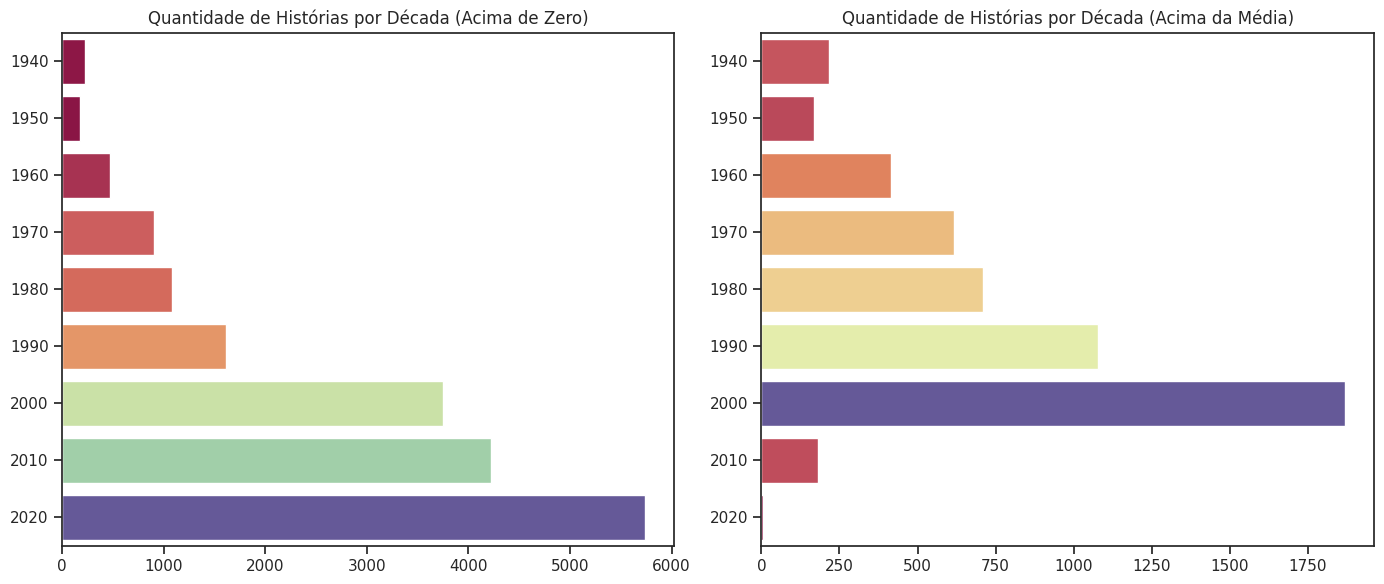

In [21]:
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

sns.barplot(data=soma_historias_zero_decade, y='decade', x='stories.available', palette='Spectral', hue="stories.available", ax=axes[0])
axes[0].set_title("Quantidade de Histórias por Década (Acima de Zero)")
axes[0].legend_.remove()
axes[0].set_xlabel("")
axes[0].set_ylabel("")

sns.barplot(data=soma_historias_media_decade, y='decade', x='stories.available', palette='Spectral', hue="stories.available", ax=axes[1])
axes[1].set_title("Quantidade de Histórias por Década (Acima da Média)")
axes[1].legend_.remove()
axes[1].set_xlabel("")
axes[1].set_ylabel("")

plt.tight_layout()
plt.show()

In [22]:
media_historias_zero = comics[comics["stories.available"] > 0].groupby("onsale_year")["stories.available"].mean().reset_index()
media_historias_media = comics[comics["stories.available"] > comics["stories.available"].mean()].groupby("onsale_year")["stories.available"].mean().reset_index()

media_historias_zero["onsale_year"] = media_historias_zero["onsale_year"].astype('category')
media_historias_media["onsale_year"] = media_historias_media["onsale_year"].astype('category')

media_historias_zero["decade"] = (media_historias_zero["onsale_year"].astype(int) // 10) * 10
media_historias_media["decade"] = (media_historias_media["onsale_year"].astype(int) // 10) * 10

media_historias_zero["decade"] = media_historias_zero["decade"].astype("category")
media_historias_media["decade"] = media_historias_media["decade"].astype("category")

media_historias_zero_decade = media_historias_zero.groupby("decade", as_index=False, observed=False)["stories.available"].mean()
media_historias_media_decade = media_historias_media.groupby("decade", as_index=False, observed=False)["stories.available"].mean()

media_historias_zero["onsale_year"] = media_historias_zero["onsale_year"].astype(int)
media_historias_media["onsale_year"] = media_historias_media["onsale_year"].astype(int)

<ipython-input-23-7c098802828f>:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.


<ipython-input-23-7c098802828f>:9: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




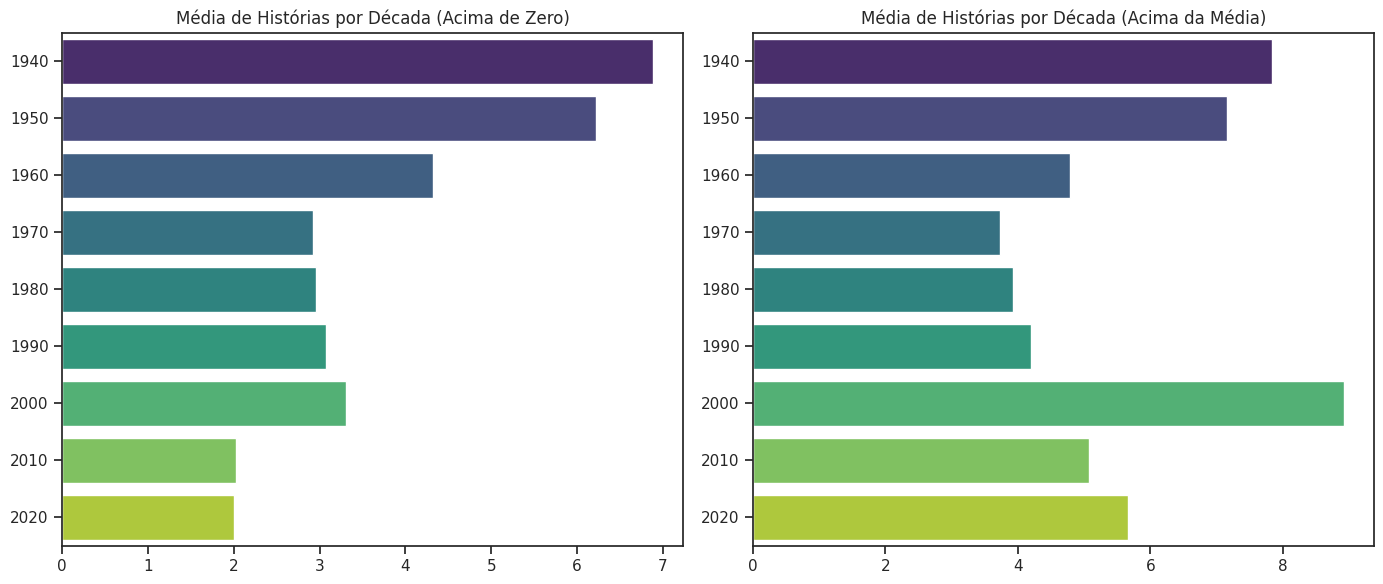

In [23]:
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

sns.barplot(data=media_historias_zero_decade, y='decade', x='stories.available', palette='viridis' , ax=axes[0])
axes[0].set_title("Média de Histórias por Década (Acima de Zero)")
#axes[0].legend_.remove()
axes[0].set_xlabel("")
axes[0].set_ylabel("")

sns.barplot(data=media_historias_media_decade, y='decade', x='stories.available', palette='viridis', ax=axes[1])
axes[1].set_title("Média de Histórias por Década (Acima da Média)")
#axes[1].legend_.remove()
axes[1].set_xlabel("")
axes[1].set_ylabel("")

plt.tight_layout()
plt.show()

<ipython-input-24-ca2cd91fb4ae>:15: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.

<ipython-input-24-ca2cd91fb4ae>:21: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.



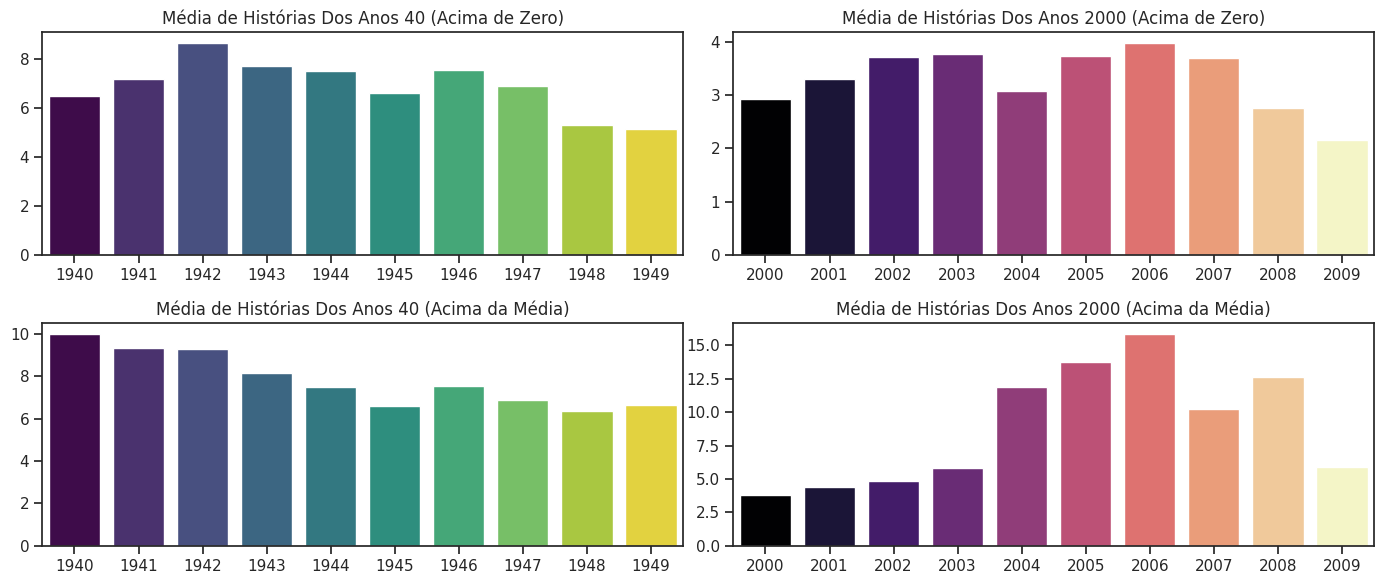

In [24]:
fig, axes = plt.subplots(2, 2, figsize=(14, 6))
# ROW 0
sns.barplot(data=media_historias_zero[(media_historias_zero["onsale_year"] >=1940) & (media_historias_zero["onsale_year"] <= 1949)], x='onsale_year', y='stories.available', palette='viridis', hue="onsale_year", ax=axes[0][0])
axes[0][0].set_title("Média de Histórias Dos Anos 40 (Acima de Zero)")
axes[0][0].legend_.remove()
axes[0][0].set_xlabel("")
axes[0][0].set_ylabel("")

sns.barplot(data=media_historias_zero[(media_historias_zero["onsale_year"] >=2000) & (media_historias_zero["onsale_year"] <= 2009)], x='onsale_year', y='stories.available', palette='magma', hue="onsale_year", ax=axes[0][1])
axes[0][1].set_title("Média de Histórias Dos Anos 2000 (Acima de Zero)")
axes[0][1].legend_.remove()
axes[0][1].set_xlabel("")
axes[0][1].set_ylabel("")
# ROW 1
sns.barplot(data=media_historias_media[(media_historias_zero["onsale_year"] >=1940) & (media_historias_zero["onsale_year"] <= 1949)], x='onsale_year', y='stories.available', palette='viridis', hue="onsale_year", ax=axes[1][0])
axes[1][0].set_title("Média de Histórias Dos Anos 40 (Acima da Média)")
axes[1][0].legend_.remove()
axes[1][0].set_xlabel("")
axes[1][0].set_ylabel("")

sns.barplot(data=media_historias_media[(media_historias_zero["onsale_year"] >=2000) & (media_historias_zero["onsale_year"] <= 2009)], x='onsale_year', y='stories.available', palette='magma', hue="onsale_year", ax=axes[1][1])
axes[1][1].set_title("Média de Histórias Dos Anos 2000 (Acima da Média)")
axes[1][1].legend_.remove()
axes[1][1].set_xlabel("")
axes[1][1].set_ylabel("")

plt.tight_layout()
plt.show()

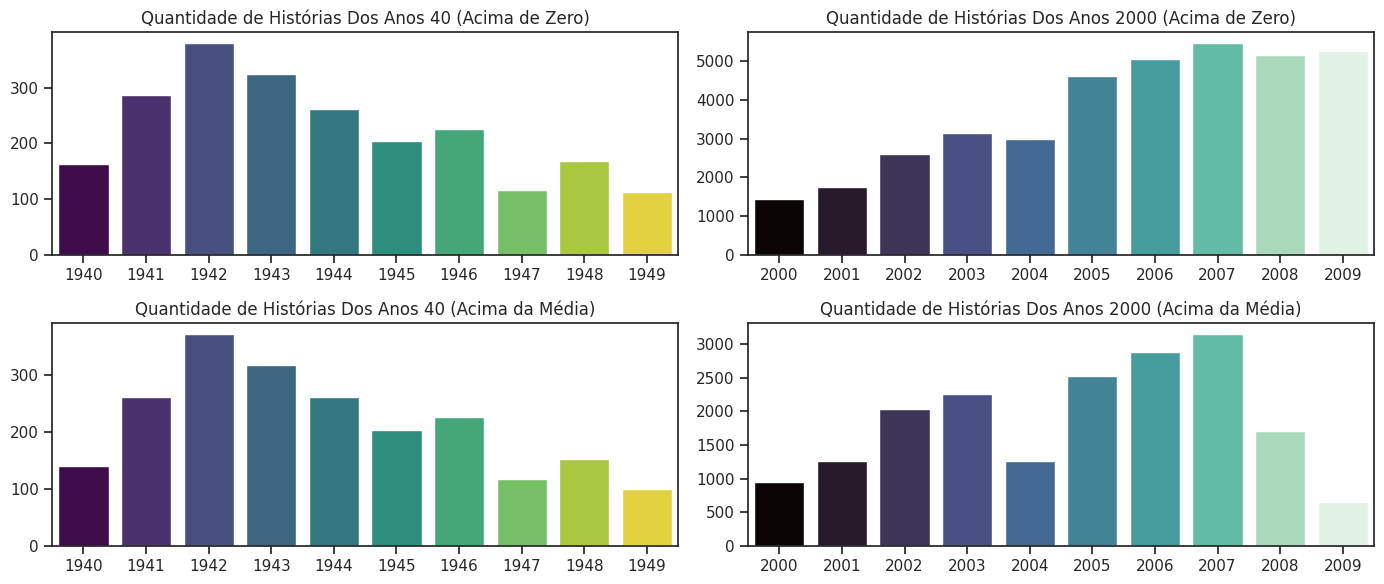

In [25]:
fig, axes = plt.subplots(2, 2, figsize=(14, 6))
# ROW 0
sns.barplot(data=soma_historias_zero[(soma_historias_zero["onsale_year"] >=1940) & (soma_historias_zero["onsale_year"] <= 1949)], x='onsale_year', y='stories.available', palette='viridis', hue="onsale_year", ax=axes[0][0])
axes[0][0].set_title("Quantidade de Histórias Dos Anos 40 (Acima de Zero)")
axes[0][0].legend_.remove()
axes[0][0].set_xlabel("")
axes[0][0].set_ylabel("")

sns.barplot(data=soma_historias_zero[(soma_historias_zero["onsale_year"] >=2000) & (soma_historias_zero["onsale_year"] <= 2009)], x='onsale_year', y='stories.available', palette='mako', hue="onsale_year", ax=axes[0][1])
axes[0][1].set_title("Quantidade de Histórias Dos Anos 2000 (Acima de Zero)")
axes[0][1].legend_.remove()
axes[0][1].set_xlabel("")
axes[0][1].set_ylabel("")
# ROW 1
sns.barplot(data=soma_historias_media[(soma_historias_media["onsale_year"] >=1940) & (soma_historias_media["onsale_year"] <= 1949)], x='onsale_year', y='stories.available', palette='viridis', hue="onsale_year", ax=axes[1][0])
axes[1][0].set_title("Quantidade de Histórias Dos Anos 40 (Acima da Média)")
axes[1][0].legend_.remove()
axes[1][0].set_xlabel("")
axes[1][0].set_ylabel("")

sns.barplot(data=soma_historias_media[(soma_historias_media["onsale_year"] >=2000) & (soma_historias_media["onsale_year"] <= 2009)], x='onsale_year', y='stories.available', palette='mako', hue="onsale_year", ax=axes[1][1])
axes[1][1].set_title("Quantidade de Histórias Dos Anos 2000 (Acima da Média)")
axes[1][1].legend_.remove()
axes[1][1].set_xlabel("")
axes[1][1].set_ylabel("")

plt.tight_layout()
plt.show()

In [26]:
#TO DO: Juntar preço com lançamento de quadrinhos

## Relacionamento Criadores, Eventos e Histórias

In [27]:
creators = creators[~creators["fullName"].isna()]
cols = ["fullName", "comics.available", "events.available", "stories.available"]
most_events = creators[cols].sort_values("events.available", ascending=False).head(25)
most_events.head(7)

,fullName,comics.available,events.available,stories.available
955,Vc Joe Caramagna,6823,29,12553
2095,Scott Hanna,1178,21,2051
1362,Frank D'ARMATA,1453,21,2680
3791,Vc Cory Petit,5006,20,8984
3630,Tom Palmer,859,19,1176
1680,Vc Chris Eliopoulos,1427,19,2435
1402,Peter David,1289,18,1718


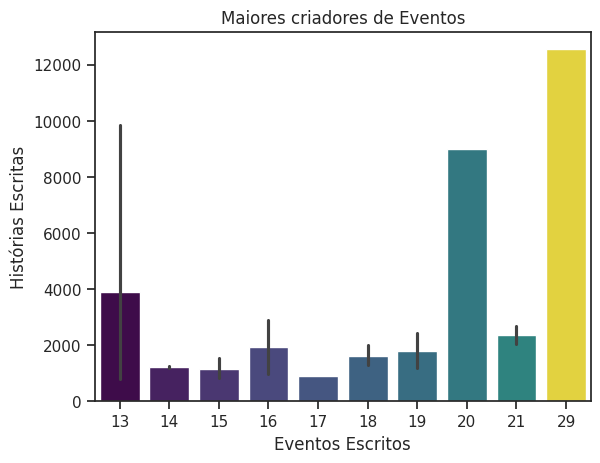

In [28]:
ax = sns.barplot(data=most_events, x="events.available", y="stories.available", hue="events.available", palette="viridis")
ax.legend_.remove()
plt.xlabel("Eventos Escritos")
plt.ylabel("Histórias Escritas")
plt.title("Maiores criadores de Eventos")
plt.show()

In [29]:
cols = ["id", "fullName", "comics.available", "stories.available", "events.available"]
most_stories = creators[cols].sort_values("stories.available", ascending=False).head(25)
most_stories.head(15)

,id,fullName,comics.available,stories.available,events.available
5282,4430,Jeff Youngquist,5405,17934,8
955,5251,Vc Joe Caramagna,6823,12553,29
726,2133,Tom Brevoort,2647,9861,13
3791,12980,Vc Cory Petit,5006,8984,20
3645,4600,Mark Paniccia,2104,8917,10
1290,10172,Vc Clayton Cowles,4099,8910,11
3112,4300,Nick Lowe,1960,7630,13
3403,12376,Wilson Moss,1412,5770,3
2848,12993,Vc Travis Lanham,3010,5708,5
4210,12974,Vc Joe Sabino,2885,5501,5


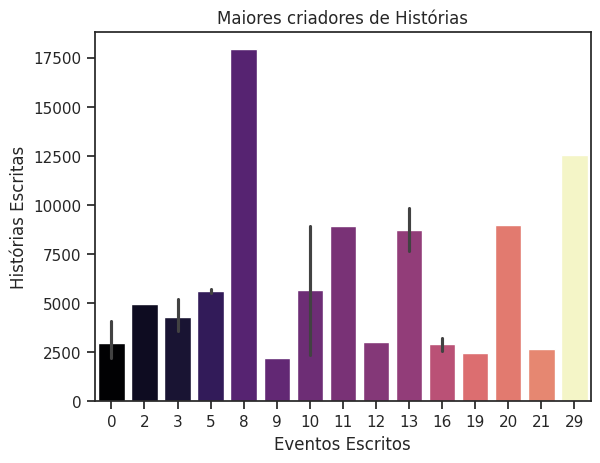

In [30]:
sns.barplot(data=most_stories, x="events.available", y="stories.available", palette="magma", hue="events.available", legend=False)
plt.xlabel("Eventos Escritos")
plt.ylabel("Histórias Escritas")
plt.title("Maiores criadores de Histórias")
plt.show()

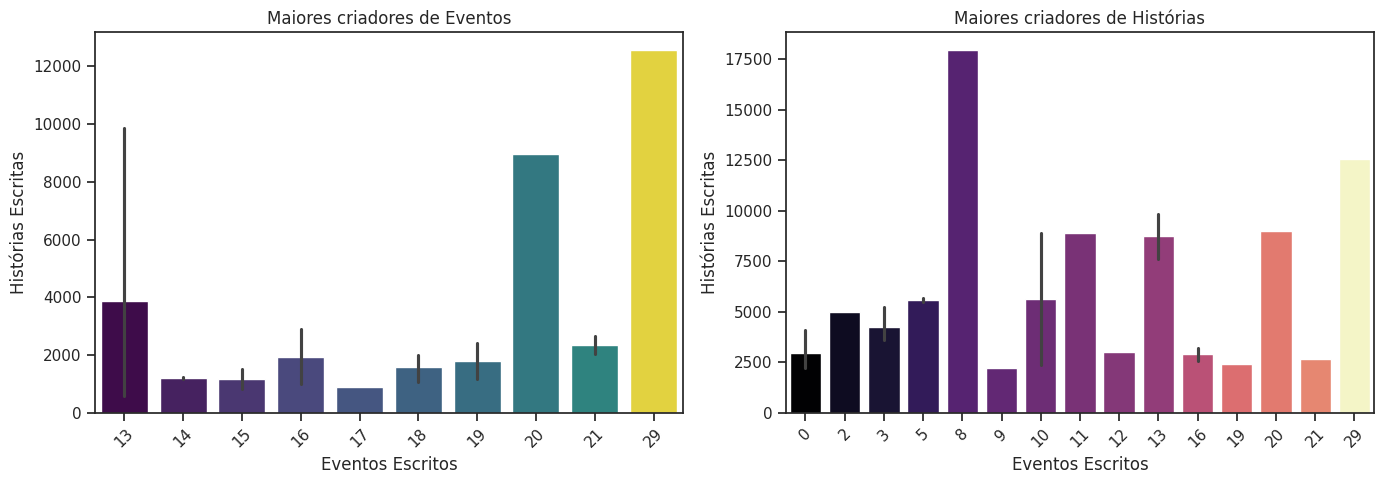

In [31]:
fig, axes = plt.subplots(1, 2, figsize=(14, 5))  # 1 row, 2 columns

sns.barplot(data=most_events, x="events.available", y="stories.available", palette='viridis', ax=axes[0],  legend=False, hue="events.available")
axes[0].set_title("Maiores criadores de Eventos")
axes[0].set_xlabel("Eventos Escritos")
axes[0].set_ylabel("Histórias Escritas")
axes[0].tick_params(axis='x', rotation=45)

sns.barplot(data=most_stories, x="events.available", y="stories.available", palette="magma", ax=axes[1],  legend=False, hue="events.available")
axes[1].set_title("Maiores criadores de Histórias")
axes[1].set_xlabel("Eventos Escritos")
axes[1].set_ylabel("Histórias Escritas")
axes[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

In [32]:
stories_index = most_stories.index
events_index = most_events.index
combined = []
for author in stories_index:
  if author in events_index:
    combined.append(author)
len(combined)

7

In [33]:
most_stories.loc[combined]

,id,fullName,comics.available,stories.available,events.available
955,5251,Vc Joe Caramagna,6823,12553,29
726,2133,Tom Brevoort,2647,9861,13
3791,12980,Vc Cory Petit,5006,8984,20
4513,350,Richard Starkings,2636,3236,16
1362,8504,Frank D'ARMATA,1453,2680,21
515,24,Brian Michael Bendis,1826,2551,16
1680,12581,Vc Chris Eliopoulos,1427,2435,19


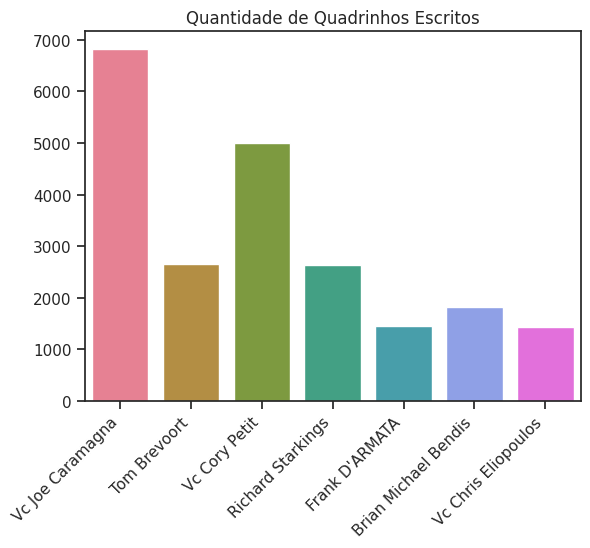

In [34]:
sns.barplot(data=most_stories.loc[combined], x="fullName", y="comics.available", palette="husl", hue="fullName")
plt.xlabel("")
plt.ylabel("")
plt.title("Quantidade de Quadrinhos Escritos")
plt.xticks(rotation=45, ha='right')
plt.show()

In [35]:
creators_rel_events["events_literal_id"] = creators_rel_events["events_ids"].apply(ast.literal_eval)
creators_rel_series["series_literal_id"] = creators_rel_series["series_ids"].apply(ast.literal_eval)

common = set(creators_rel_events["events_literal_id"][0]) & set(creators_rel_events["events_literal_id"][1]) & set(creators_rel_events["events_literal_id"][2]) & set(creators_rel_events["events_literal_id"][3]) & set(creators_rel_events["events_literal_id"][4])
common = list(common)

common_events = events[events["id"].isin(common)]

common_events[["title", "description", "Ano_Inicio", "Ano_Final"]]

,title,description,Ano_Inicio,Ano_Final
18,Dark Reign,Norman Osborn came out the hero of Secret Inva...,2008,2009
35,Initiative,"After the partial destruction of Stamford, CT,...",2007,2010
53,Secret Invasion,The shape-shifting Skrulls have been infiltrat...,2008,2009


## Relacionamento Eventos Temporalmente

In [36]:
len_start = len(events[events["start"].isna()])
len_end = len(events[events["end"].isna()])

print(f"Quantidade de valores nulos na data de início: {len_start}")
print(f"Quantidade de valores nulos na data de fim: {len_end}")
print(f"Total de linhas: {len(events)}")

Quantidade de valores nulos na data de início: 0
Quantidade de valores nulos na data de fim: 0
Total de linhas: 64


In [37]:
events[["title", "description", "duracao", "comics.available"]].sort_values(by="duracao", ascending=False)

,title,description,duracao,comics.available
38,Kraven's Last Hunt,Frustrated with his repeated failed attempts a...,25,9
56,Secret Wars II,The omnipotent Beyonder comes to Earth to bett...,24,41
45,Mutant Massacre,The underground community of mutants known as ...,24,13
54,Secret Wars,The most powerful heroes and villains in the M...,24,41
7,Armor Wars,Tony Stark discovers that someone has been ste...,23,12
...,...,...,...,...
61,Spider-Island,"This summer, heroes, villains and ordinary peo...",0,29
68,X-Men: Battle of the Atom,The presence of the original X-Men in the mode...,0,10
65,War of Kings,In an effort to punish the Skrulls for their a...,0,43
70,X-Men: Schism,A new Hellfire Club unleashes Sentinels on Uto...,0,11


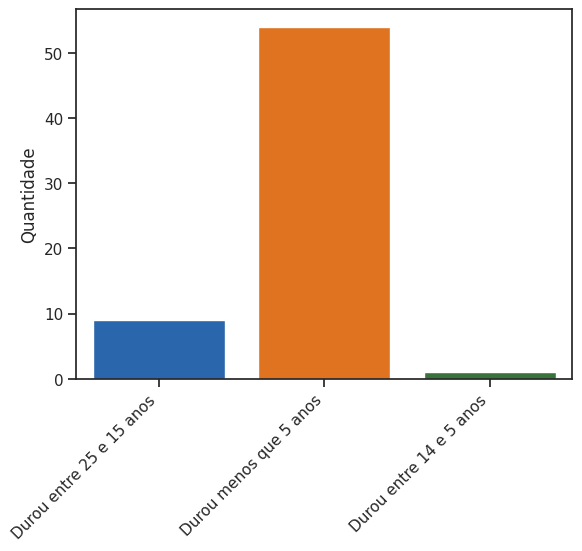

In [38]:
custom_colors = {
    "Durou menos que 5 anos": "#FF6F00",
    "Durou entre 14 e 5 anos": "#2E7D32",
    "Durou entre 25 e 15 anos": "#1565C0",
}

sns.countplot(data=events, x='categoria_duracao', palette=custom_colors, hue="categoria_duracao")
plt.ylabel("Quantidade")
plt.xlabel("")
plt.xticks(rotation=45, ha='right')
plt.show()

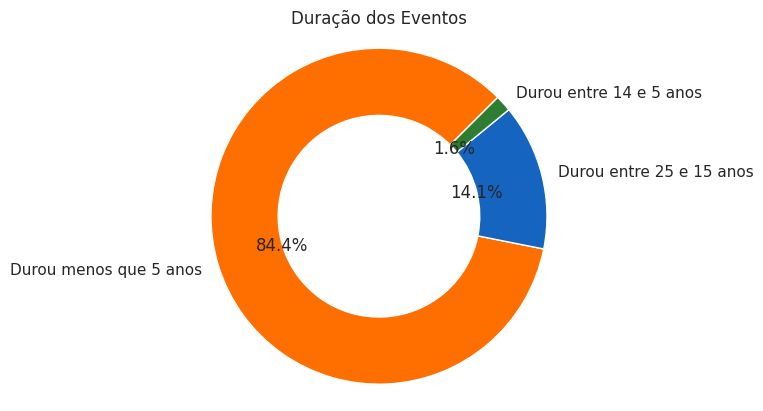

In [39]:
counts = events['categoria_duracao'].value_counts()

labels = counts.index
sizes = counts.values

colors = [custom_colors[label] for label in labels]

fig, ax = plt.subplots()
ax.pie(sizes, labels=labels, colors=colors, startangle=45, wedgeprops={'width':0.4}, autopct='%1.1f%%')
ax.axis('equal')
plt.title("Duração dos Eventos")
plt.show()

In [40]:
events[events["categoria_duracao"] == "Durou entre 14 e 5 anos"][["title", "description", "Ano_Inicio", "duracao"]]

,title,description,Ano_Inicio,duracao
31,Infinity Gauntlet,"When the Mad Titan, Thanos, acquires the all-p...",1991,14


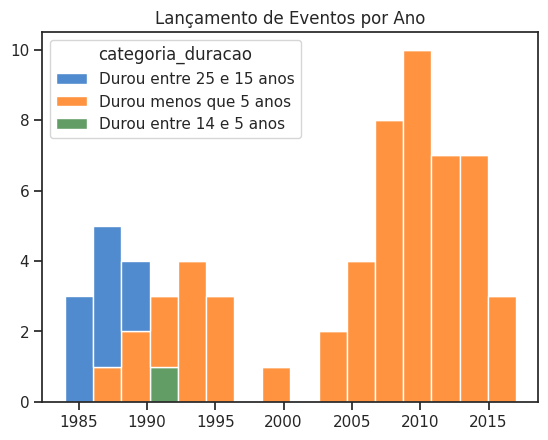

In [41]:
sns.histplot(data=events[events["Ano_Inicio"] <= 2025], x="Ano_Inicio", binwidth=2, hue="categoria_duracao", multiple="stack", palette=custom_colors)
plt.title("Lançamento de Eventos por Ano")
plt.xlabel("")
plt.ylabel("")
plt.show()

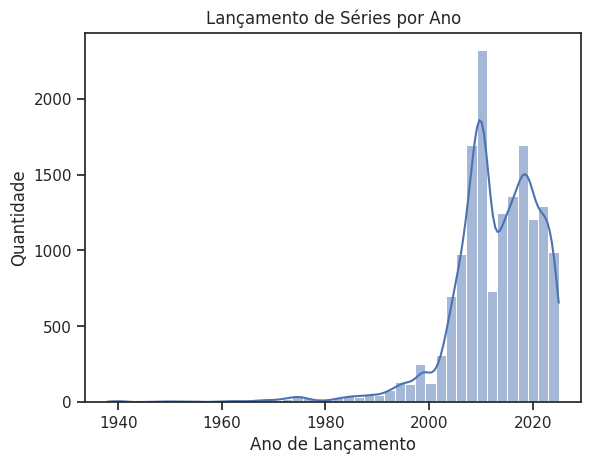

In [42]:
sns.histplot(data=series[(series["startYear"] > 1900) & (series["startYear"] <= 2025)], x="startYear", kde=True, binwidth=2)
plt.title("Lançamento de Séries por Ano")
plt.xlabel("Ano de Lançamento")
plt.ylabel("Quantidade")
plt.show()

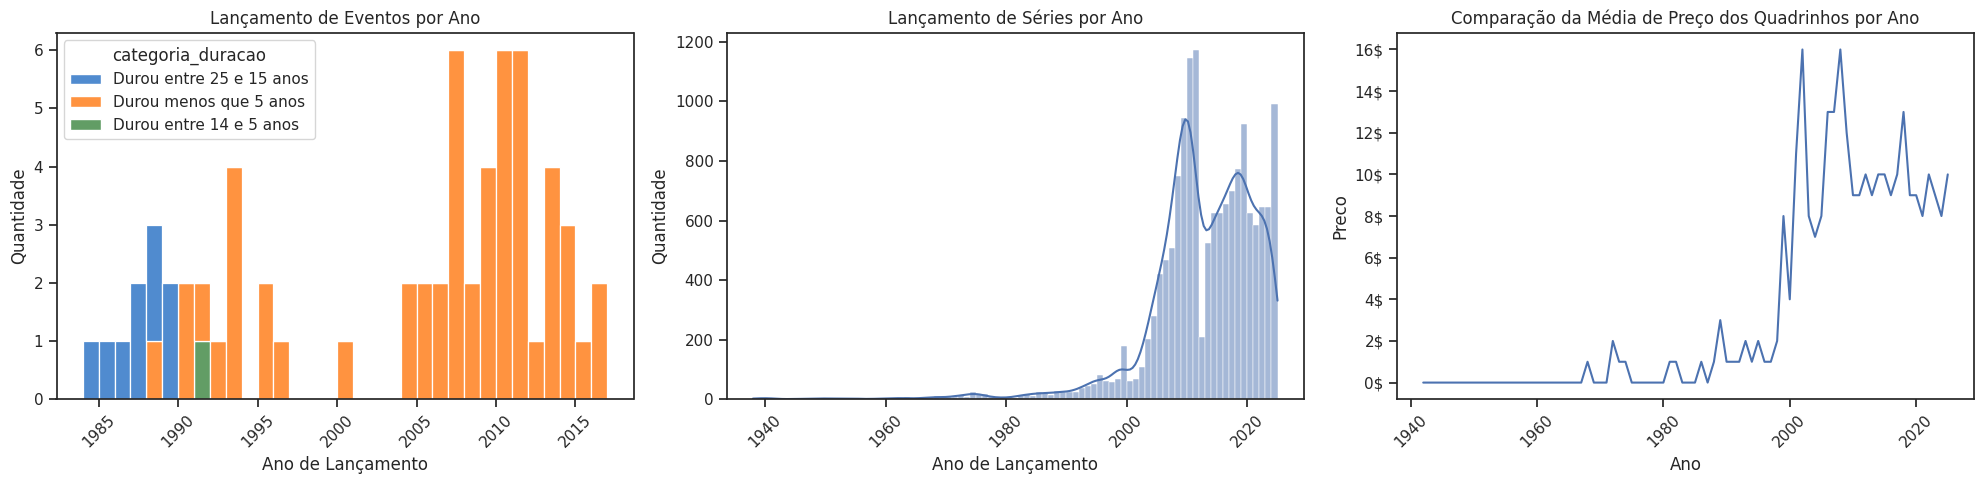

In [43]:
fig, axes = plt.subplots(1, 3, figsize=(20, 5))  # 1 row, 2 columns

sns.histplot(data=events[(events["Ano_Inicio"] <= 2025) & (events["Ano_Inicio"] >= 1900)], x="Ano_Inicio", binwidth=1, hue="categoria_duracao", multiple="stack", ax = axes[0], palette=custom_colors)
axes[0].set_title("Lançamento de Eventos por Ano")
axes[0].set_xlabel("Ano de Lançamento")
axes[0].set_ylabel("Quantidade")
axes[0].tick_params(axis='x', rotation=45)

#sns.histplot(data=series[(series["startYear"] >= 2010) & (series["startYear"] <= 2025)], x="startYear", kde=True, binwidth=1, ax=axes[1])
sns.histplot(data=series[(series["startYear"] >= 1900) & (series["startYear"] <= 2025)], x="startYear", kde=True, binwidth=1, ax=axes[1])
axes[1].set_title("Lançamento de Séries por Ano")
axes[1].set_xlabel("Ano de Lançamento")
axes[1].set_ylabel("Quantidade")
axes[1].tick_params(axis='x', rotation=45)

sns.lineplot(data=media_precos_maior_zero, x='Ano', y='Preco', markers=True, dashes=False)
axes[2].set_title("Comparação da Média de Preço dos Quadrinhos por Ano")
axes[2].tick_params(axis='x', rotation=45)
formatter = FuncFormatter(lambda x, pos: f'{x:.0f}$')
axes[2].yaxis.set_major_formatter(formatter)


plt.tight_layout()
plt.show()

In [44]:
events[(events["Ano_Inicio"] >= 2010) & (events["Ano_Inicio"] <= 2020)][["title", "description", "duracao", "Ano_Inicio", "Ano_Final"]].reset_index(drop=True)

,title,description,duracao,Ano_Inicio,Ano_Final
0,Age of Ultron,In a 10-issue event written by Brian Michael B...,0,2013,2013
1,Age of X,In a strange reality where the X-Men never cam...,0,2011,2011
2,Avengers VS X-Men,A 12-issue event written by the unprecedented ...,0,2012,2012
3,Axis,The Red Skull has taken over Genosha and stand...,0,2014,2014
4,Chaos War,When the Chaos King embarks on a campaign to w...,1,2010,2011
5,Dead No More: The Clone Conspiracy,The Jackal has returned and initiated the Clon...,1,2016,2017
6,Fear Itself,"The Serpent, God of Fear and brother to the Al...",0,2011,2011
7,Heroic Age,Still lurking in the shadows are forces of evi...,2,2010,2012
8,Infinity,While the most powerful Avengers journey into ...,0,2013,2013
9,Inhumanity,"Following Infinity, the actions of Black Bolt ...",1,2013,2014


In [45]:
events[(events["Ano_Inicio"] >= 1985) & (events["Ano_Inicio"] <= 1990)][["title", "description", "duracao", "Ano_Inicio", "Ano_Final"]].reset_index(drop=True)

,title,description,duracao,Ano_Inicio,Ano_Final
0,Acts of Vengeance!,Loki sets about convincing the super-villains ...,19,1989,2008
1,Armor Wars,Tony Stark discovers that someone has been ste...,23,1987,2010
2,Atlantis Attacks,Ghaur returns to complete his quest to resurre...,22,1989,2011
3,Days of Future Present,An adult Franklin Richards travels back from t...,0,1990,1990
4,Evolutionary War,The High Evolutionary intends to help humanity...,0,1988,1988
5,Fall of the Mutants,"The X-Men battled the Adversary in Dallas, and...",19,1988,2007
6,Inferno,The demon-sorcerer N'astirh not only wished to...,22,1988,2010
7,Kraven's Last Hunt,Frustrated with his repeated failed attempts a...,25,1987,2012
8,Mutant Massacre,The underground community of mutants known as ...,24,1986,2010
9,Secret Wars II,The omnipotent Beyonder comes to Earth to bett...,24,1985,2009


In [46]:
top_series = series.sort_values(by="comics.available", ascending=False).head(10)

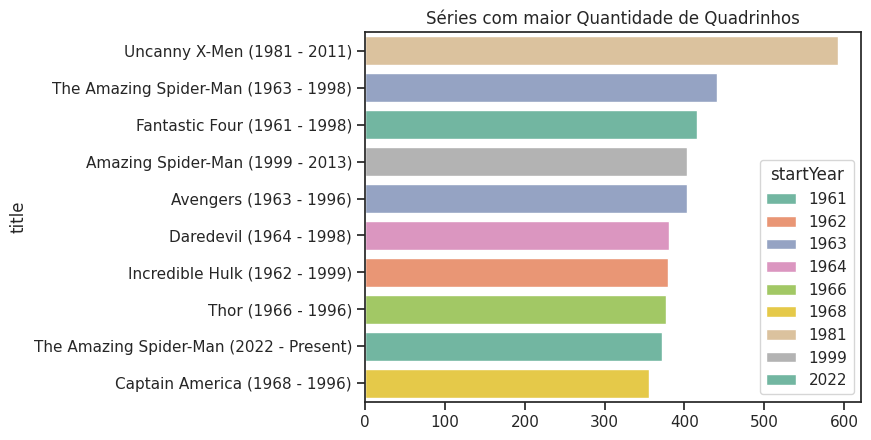

In [47]:
sns.barplot(data=top_series, x="comics.available", y="title", hue="startYear", palette="Set2")
plt.xlabel("")
plt.title("Séries com maior Quantidade de Quadrinhos")
plt.show()

In [54]:
events_em_comum = events[events["id"].isin(common)]
events_em_comum[["title", "description", "Ano_Inicio", "Ano_Final"]]


,title,description,Ano_Inicio,Ano_Final
18,Dark Reign,Norman Osborn came out the hero of Secret Inva...,2008,2009
35,Initiative,"After the partial destruction of Stamford, CT,...",2007,2010
53,Secret Invasion,The shape-shifting Skrulls have been infiltrat...,2008,2009
